In [9]:
import torch

entrypoints = torch.hub.list('pytorch/vision', force_reload=True)
for e in entrypoints:
    if "resnet" in e:
        print(e)

Downloading: "https://github.com/pytorch/vision/zipball/main" to /home/sillybierba_gmail_com/.cache/torch/hub/main.zip


deeplabv3_resnet101
deeplabv3_resnet50
fcn_resnet101
fcn_resnet50
resnet101
resnet152
resnet18
resnet34
resnet50
wide_resnet101_2
wide_resnet50_2


index=0, label=n02814533
index=1, label=n04507155
index=2, label=n04070727
index=3, label=n03388043
index=4, label=n01698640
index=5, label=n01641577
index=6, label=n04456115
index=7, label=n04417672
index=8, label=n03599486
index=9, label=n02802426
index=10, label=n04532670
index=11, label=n02190166
index=12, label=n03763968
index=13, label=n04254777
index=14, label=n03042490
index=15, label=n02281406
index=16, label=n04399382
index=17, label=n02892201
index=18, label=n03992509
index=19, label=n03617480
index=20, label=n04356056
index=21, label=n04179913
index=22, label=n03814639
index=23, label=n03085013
index=24, label=n03089624
index=25, label=n03026506
index=26, label=n04251144
index=27, label=n03970156
index=28, label=n01984695
index=29, label=n04099969
index=30, label=n03444034
index=31, label=n02795169
index=32, label=n04501370
index=33, label=n02074367
index=34, label=n02403003
index=35, label=n07614500
index=36, label=n04532106
index=37, label=n02823428
index=38, label=n07615

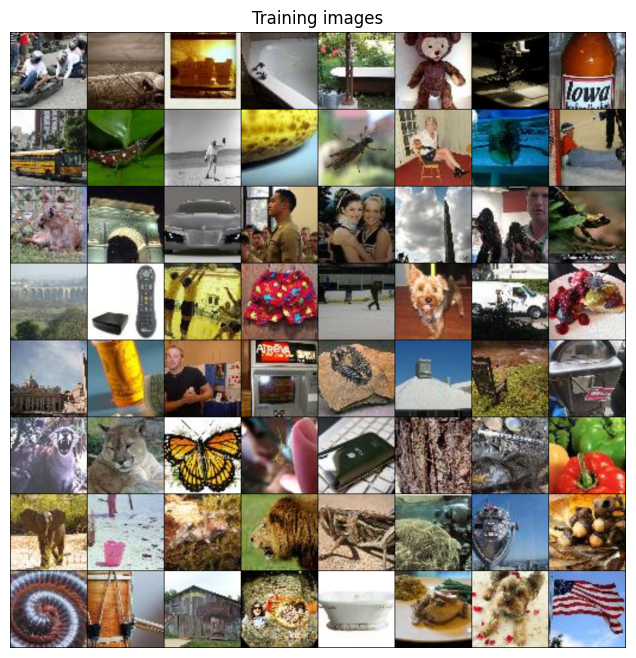

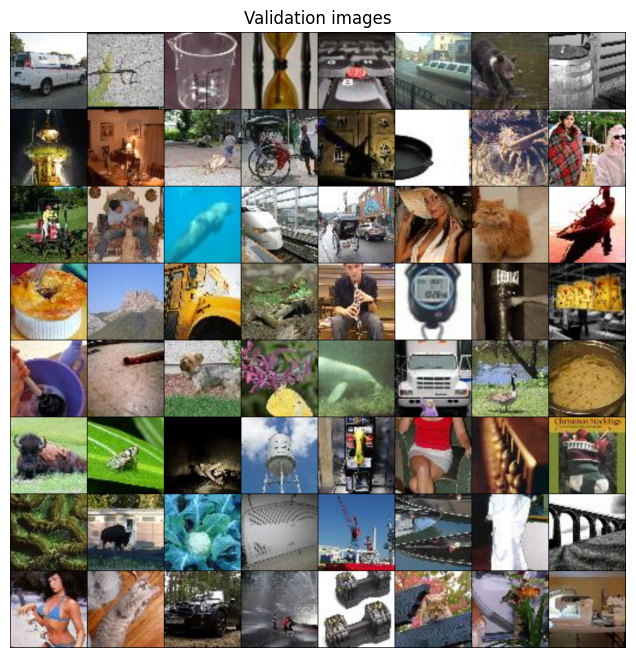

In [2]:
import lightning as L
from lightning.pytorch.loggers import CSVLogger
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from local_utilities import LightningModel, TinyImageNetDataModule

dm = TinyImageNetDataModule(height_width=(224, 224), batch_size=64, num_workers=0)
dm.prepare_data()
dm.setup()

#print(f'dm.train.size = {len(dm.train)}')
#for i in range(len(dm.train)):
#    img, label = dm.train[i]
#    if img.shape != (3, 224, 224):
#        print(f'image[{i}].shape = {img.shape}')
#        print(f'image[{i}].path = {dm.train.images[i]} , image[{i}].label={label}')
#    print(f'image[{i}].shape = {img.shape}, label[{i}] = {label}')
#
#print(f'dm.val.size = {len(dm.val)}')
#for i in range(len(dm.val)):
#    img, label = dm.val[i]
#    print(f'image[{i}].shape = {img.shape}, label[{i}] = {label}')


for batch, (images, labels) in enumerate(dm.val_dataloader()):  
    plt.figure(figsize=(8, 8))
    plt.axis("off")
    plt.title("Training images")
    plt.imshow(np.transpose(torchvision.utils.make_grid(
        images[:64], 
        padding=2,
        normalize=True),
        (1, 2, 0)))
    plt.show()
    # print(f"Batch {batch}: len(images) = {len(images)}, len(labels) = {len(labels)}")
    break


for batch, (images, labels) in enumerate(dm.train_dataloader()):  
    plt.figure(figsize=(8, 8))
    plt.axis("off")
    plt.title("Validation images")
    plt.imshow(np.transpose(torchvision.utils.make_grid(
        images[:64], 
        padding=2,
        normalize=True),
        (1, 2, 0)))
    plt.show()
    # print(f"Batch {batch}: len(images) = {len(images)}, len(labels) = {len(labels)}")
    break




Using cache found in /home/sillybierba_gmail_com/.cache/torch/hub/pytorch_vision_main
Global seed set to 123
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


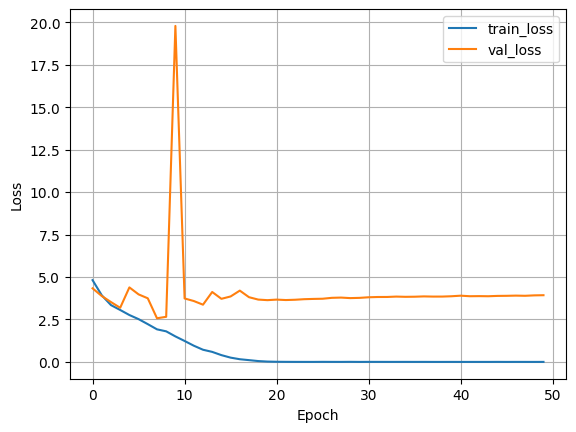

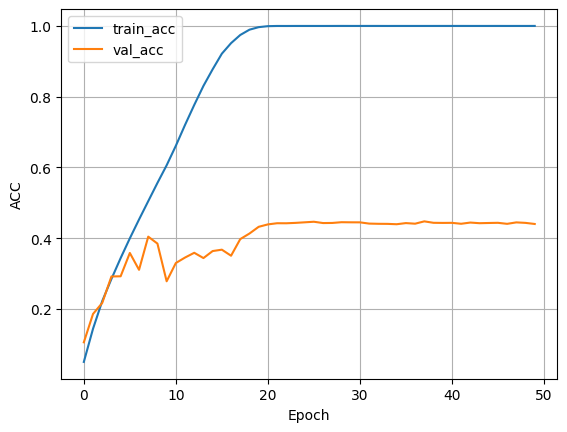

In [12]:
import lightning as L
from lightning.pytorch.loggers import CSVLogger
import torch
import torchvision
from local_utilities import LightningModel, TinyImageNetDataModule, plot_csv_logger

pytorch_model = torch.hub.load('pytorch/vision', 'resnet50', weights=None)
pytorch_model.load_state_dict(torch.load('tiny-imagenet-resnet50.pt'))

L.pytorch.seed_everything(123)
# print(pytorch_model)

lightning_model = LightningModel(model=pytorch_model, learning_rate=0.1)

trainer = L.Trainer(
    max_epochs=50,
    accelerator="gpu",
    devices=1,
    logger=CSVLogger(save_dir="logs/", name="my-model"),
    deterministic=True,
)

plot_csv_logger(f"logs/my-model/version_8/metrics.csv")

In [13]:
dm = TinyImageNetDataModule(height_width=(224, 224), batch_size=64, num_workers=0)
dm.prepare_data()
dm.setup()

trainer.test(model=lightning_model, dataloaders=dm.val_dataloader())

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/sillybierba_gmail_com/anaconda3/envs/dl-fundamentals/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing DataLoader 0: 100%|██████████| 157/157 [00:26<00:00,  5.99it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃   Runningstage.testing    ┃                           ┃
┃          metric           ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.44020000100135803    │
└───────────────────────────┴───────────────────────────┘

[{'test_acc': 0.44020000100135803}]

In [ ]:
trainer.test(model=lightning_model, dataloaders=dm.train_dataloader())